# Assignment 18 (Forecasting) Airlines Dataset 

## Q. Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from pylab import rcParams
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
# Loading the Dataset
airlines_df = pd.read_excel("Airlines+Data.xlsx")

In [3]:
airlines_df1 = airlines_df.copy()

In [4]:
airlines_df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
# Checking for null values
airlines_df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
# Checking the datatypes
airlines_df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
# Summary Statistics
airlines_df1.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


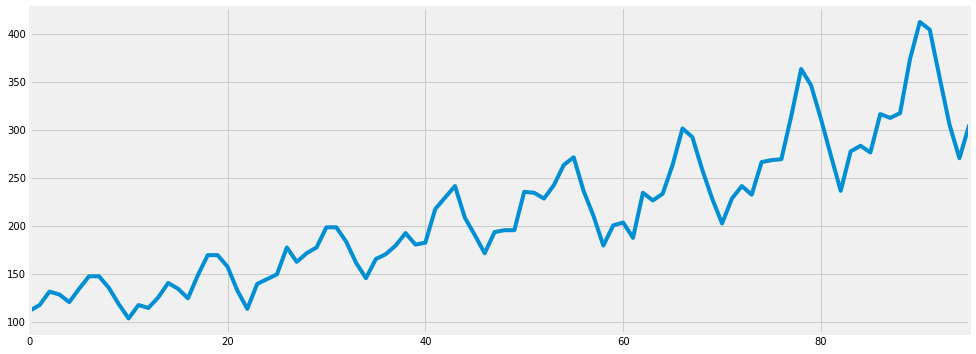

In [8]:
# Plotting Graph
airlines_df1['Passengers'].plot(figsize=(15, 6))
plt.show()

In [9]:
airlines_df1 = airlines_df1.set_index('Month')

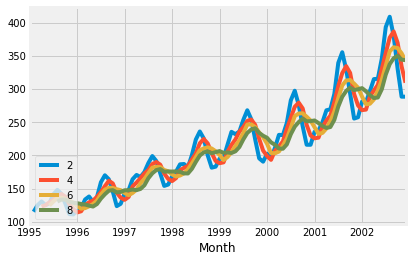

In [10]:
for i in range(2,10,2):
    airlines_df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

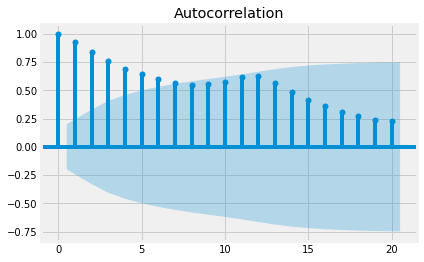

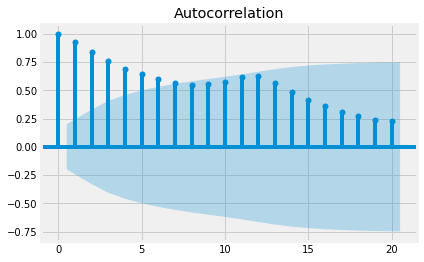

In [11]:
# Autocorrelation
tsa_plots.plot_acf(airlines_df1['Passengers'])

## Building Time Series Forecasting with ARIMA 

In [12]:
x = airlines_df1['Passengers'].values

In [13]:
size = int(len(x) * 0.66)

In [14]:
train, test = x[0:size], x[size:len(x)]

In [15]:
model = ARIMA(train, order=(5,1,0))

In [16]:
model_fit = model.fit(disp=0)

In [17]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Mon, 26 Jul 2021   AIC                            539.817
Time:                        22:29:57   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.241      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.501      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

## This Summarizes the Coefficient values used as well as the skill of the fit on the in-sample Observations. 

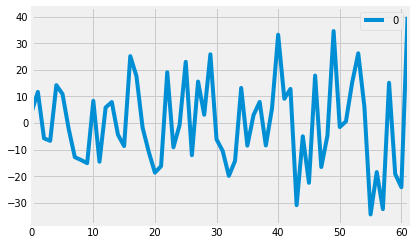

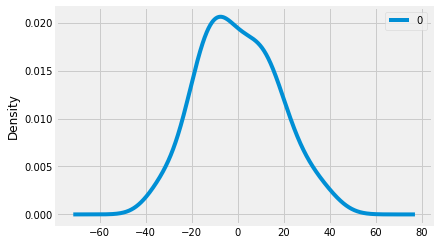

               0
count  62.000000
mean    0.057349
std    16.895802
min   -34.303302
25%   -12.610655
50%    -1.589481
75%    12.565598
max    39.955350


In [18]:
# Plotting residual plot and kde plot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## The plot of the residual errors suggests that there may still be some trend information not captured by the model
## The results show that there is no a bias in the prediction (a zero mean in the residuals) 

## Rolling Forecast ARIMA Model  

In [19]:
history = [x1 for x1 in train]

In [20]:
predictions = list()

In [21]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted = %f, Expected = %f' % (yhat, obs))

Predicted = 239.755195, Expected = 227.000000
Predicted = 220.737302, Expected = 234.000000
Predicted = 237.815018, Expected = 264.000000
Predicted = 252.750571, Expected = 302.000000
Predicted = 306.715807, Expected = 293.000000
Predicted = 285.374663, Expected = 259.000000
Predicted = 250.264015, Expected = 229.000000
Predicted = 227.093114, Expected = 203.000000
Predicted = 211.011451, Expected = 229.000000
Predicted = 253.260267, Expected = 242.000000
Predicted = 252.490679, Expected = 233.000000
Predicted = 234.042132, Expected = 267.000000
Predicted = 268.773637, Expected = 269.000000
Predicted = 261.782274, Expected = 270.000000
Predicted = 271.798028, Expected = 315.000000
Predicted = 314.422094, Expected = 364.000000
Predicted = 368.637728, Expected = 347.000000
Predicted = 334.957881, Expected = 312.000000
Predicted = 301.161842, Expected = 274.000000
Predicted = 265.936471, Expected = 237.000000
Predicted = 244.037183, Expected = 278.000000
Predicted = 312.961788, Expected =

In [22]:
error = mean_squared_error(test, predictions)
print('Test MSE : %.3f' % error)

Test MSE : 782.495


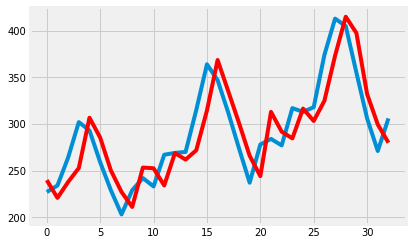

In [23]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.  

## Comparing Multiple Models  

In [24]:
# Copying Dataset in other variable
airlines_df2 = airlines_df.copy()

In [25]:
airlines_df2 = pd.get_dummies(airlines_df2, columns = ['Month'])

In [26]:
airlines_df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
airlines_df2.shape

(96, 97)

In [28]:
t = np.arange(1,97)

In [29]:
airlines_df2['t'] = t

In [30]:
airlines_df2['t_sq'] = airlines_df2['t']*airlines_df2['t']

In [31]:
log_Passengers = np.log(airlines_df2['Passengers'])

In [32]:
airlines_df2['log_Passengers'] = log_Passengers

In [33]:
airlines_df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [34]:
airlines_df2.rename(columns = {'Month_1995-01-01 00:00:00':'Jan_1995','Month_1995-02-01 00:00:00':'Feb_1995','Month_1995-03-01 00:00:00':'Mar_1995','Month_1995-04-01 00:00:00':'Apr_1995','Month_1995-05-01 00:00:00':'May_1995','Month_1995-06-01 00:00:00':'June_1995','Month_1995-07-01 00:00:00':'July_1995','Month_1995-08-01 00:00:00':'Aug_1995','Month_1995-09-01 00:00:00':'Sept_1995','Month_1995-10-01 00:00:00':'Oct_1995','Month_1995-11-01 00:00:00':'Nov_1995','Month_1995-12-01 00:00:00':'Dec_1995'}, inplace = True)

In [35]:
airlines_df2.head()

,Passengers,Jan_1995,Feb_1995,Mar_1995,Apr_1995,May_1995,June_1995,July_1995,Aug_1995,Sept_1995,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [36]:
train1, test1 = np.split(airlines_df2, [int(.67 *len(airlines_df2))])

In [37]:
linear = smf.ols('Passengers ~ t',data=train1).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin = np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [38]:
quad = smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad = np.sqrt(np.mean((np.array(test1['Passengers']) - np.array(predquad))**2))
rmsequad

53.1895551441541

In [39]:
expo = smf.ols('Passengers~t',data=train1).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [40]:
# For Year 1995
additive = smf.ols('Passengers~Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test1[['Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']])))
rmseadd = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

118.60439843615572

In [41]:
addlinear = smf.ols('Passengers~Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

118.60439843615572

In [42]:
addquad = smf.ols('Passengers~t+t_sq+Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']])))
rmseaddquad = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

83.97481125259863

In [43]:
mulsea = smf.ols('log_Passengers~Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test1[['Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']])))
rmsemul = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

122.20973607172188

In [44]:
mullin = smf.ols('log_Passengers~t+Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test1[['t','Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']])))
rmsemullin = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemullin

40.901945550711446

In [45]:
mul_quad = smf.ols('log_Passengers~t+t_sq+Jan_1995+Feb_1995+Mar_1995+Apr_1995+May_1995+June_1995+July_1995+Aug_1995+Sept_1995+Oct_1995+Nov_1995+Dec_1995',data=train1).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test1[['t','t_sq','Jan_1995','Feb_1995','Mar_1995','Apr_1995','May_1995','June_1995','July_1995','Aug_1995','Sept_1995','Oct_1995','Nov_1995','Dec_1995']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

100.05904451760036

## Conclusion 

In [46]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemullin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemullin,rmsequad])}

In [47]:
rmse = pd.DataFrame(output)

In [48]:
print(rmse)

           Model         Values
0  rmse_mul_quad   1.000590e+02
1        rmseadd   1.186044e+02
2  rmseaddlinear   1.186044e+02
3    rmseaddquad   8.397481e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul   1.222097e+02
7     rmsemullin   4.090195e+01
8       rmsequad   5.318956e+01


## Multiplicative seasonality with linear trend has the best RMSE value